In [186]:
#Reading the CSV file to a  pandas dataframe object
import pandas as pd
df = pd.read_csv(r"C:\Users\saeed\Downloads\archive.zip")

In [187]:
#Taking  a look at the dataframe
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [188]:
# The numerical feature Pregnancies has small granularity
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [189]:
#Storing the features of the dataframe inside a features list
features = [i for i in df.columns if i != "Outcome"]
#Preganancies will be treated as a categrical feature since it has small granularity 
num_features = [i for i in features if i != "Pregnancies"]
cat_features = ["Pregnancies"]

In [190]:
#One Hot Encodig the Pregnancies Feature since it has small Granularity
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(sparse=False, sparse_output=False)
encoder.fit(df[["Pregnancies"]])
encoded_dataframe = encoder.transform(df[["Pregnancies"]])
encoded_features = encoder.get_feature_names_out(input_features=cat_features)
df_encoded = pd.DataFrame(encoded_dataframe, columns = encoded_features)
df = pd.concat([df.drop(columns=["Pregnancies"]), df_encoded], axis=1)


C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


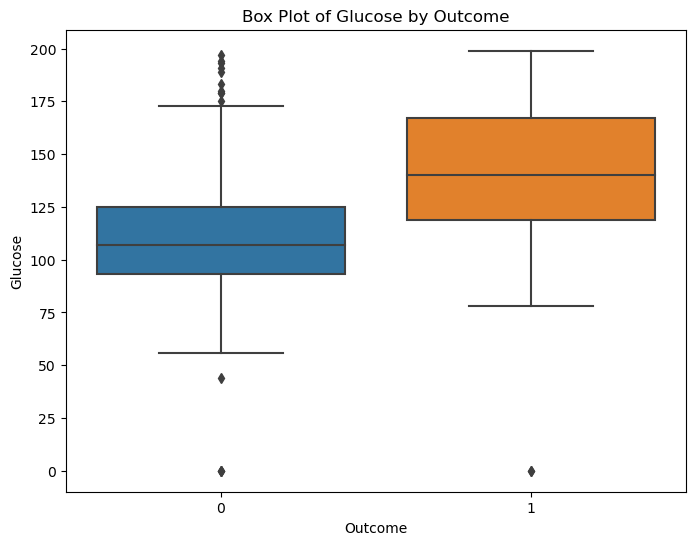

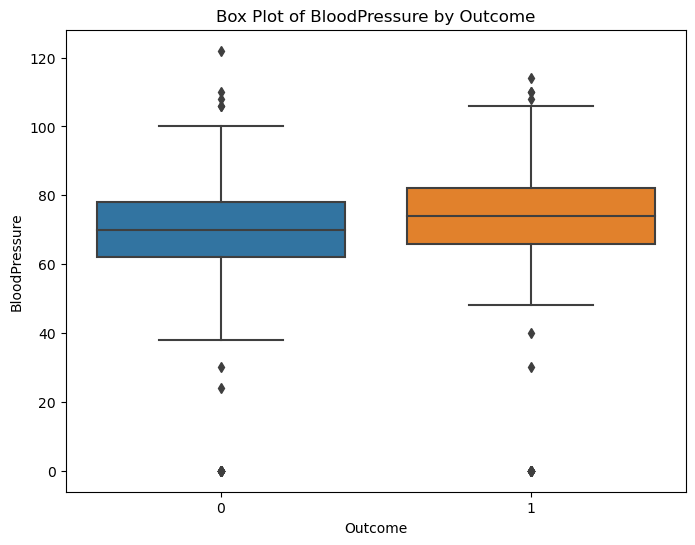

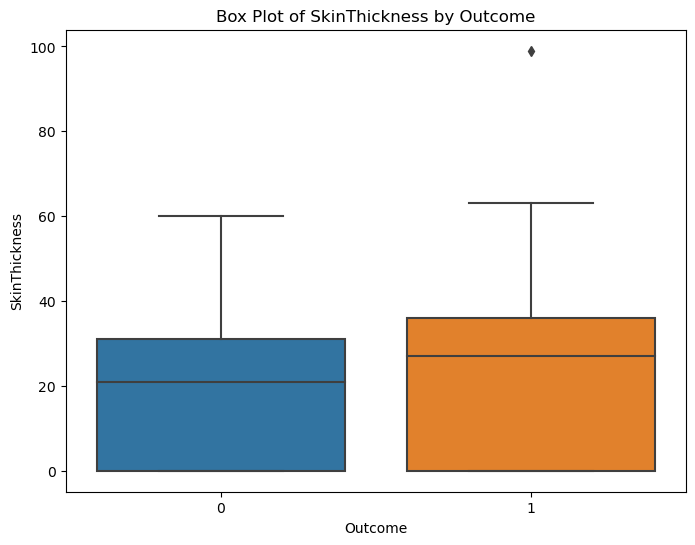

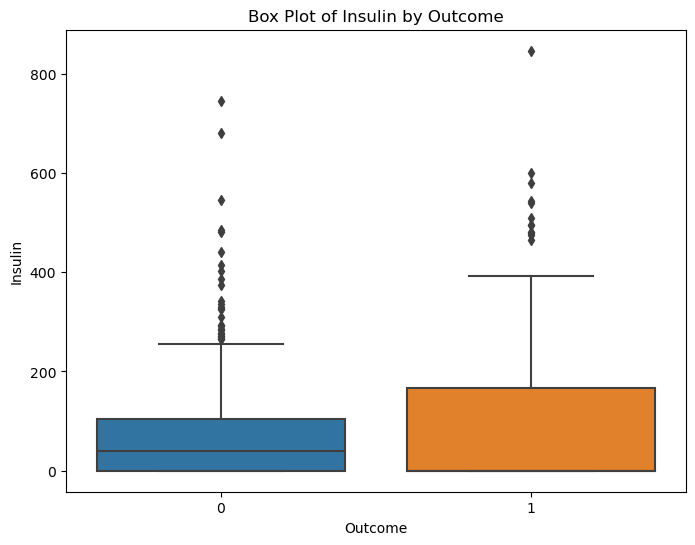

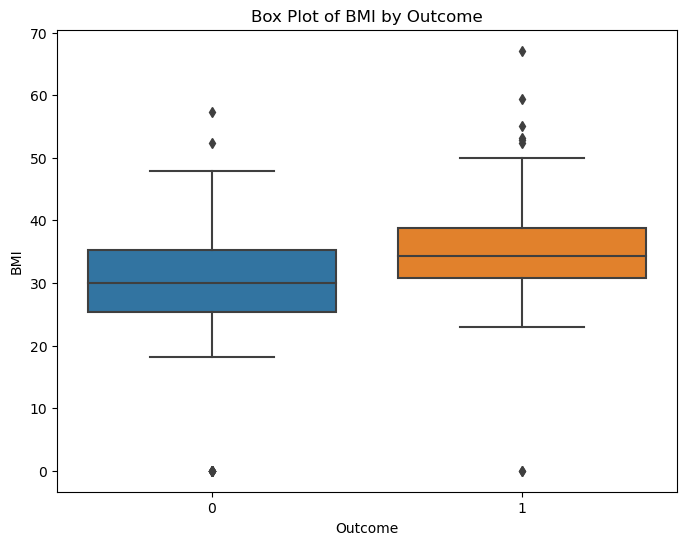

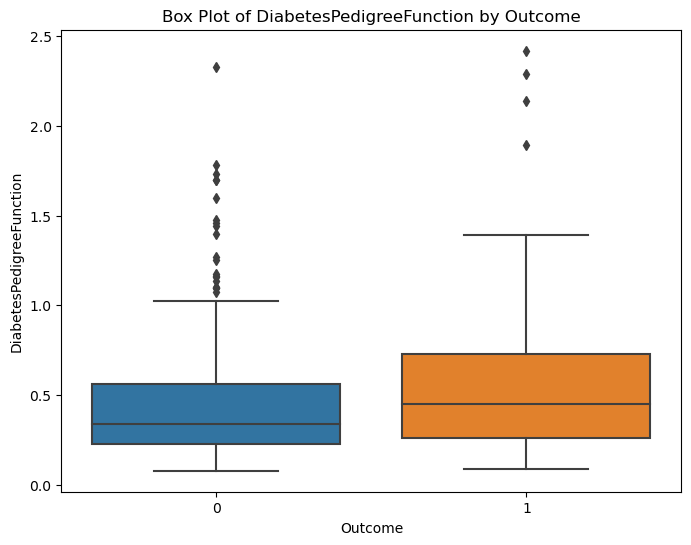

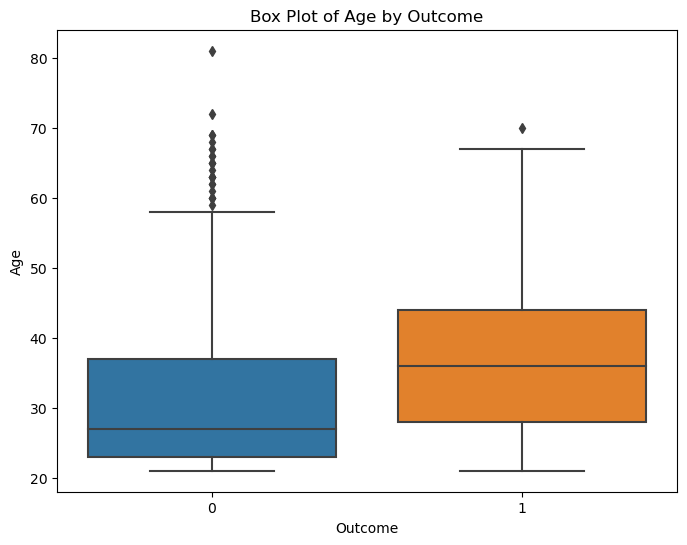

In [191]:
#Creating boxplots to visualize the distribution of our numerical features and also take a look at the outliers
import seaborn as sns
import matplotlib.pyplot as plt
for i in num_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y= i, data=df)
    plt.title('Box Plot of {} by Outcome'.format(i))
    plt.xlabel('Outcome')
    plt.ylabel(format(i))
    plt.show()

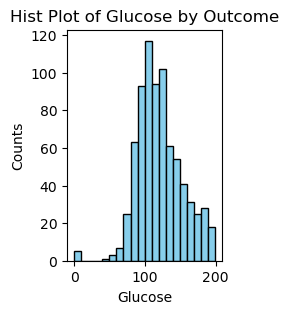

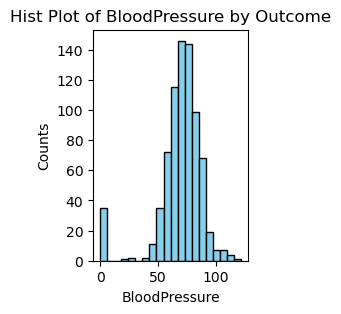

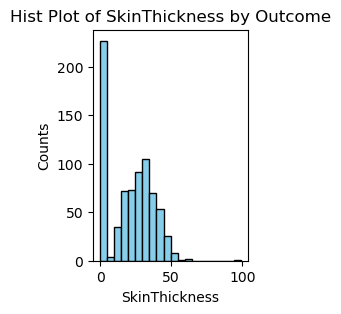

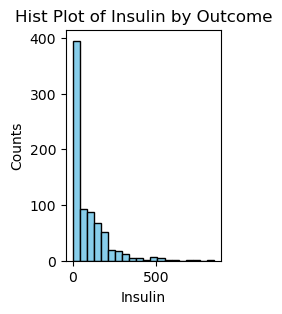

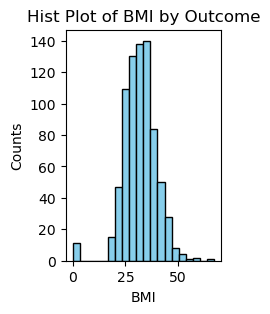

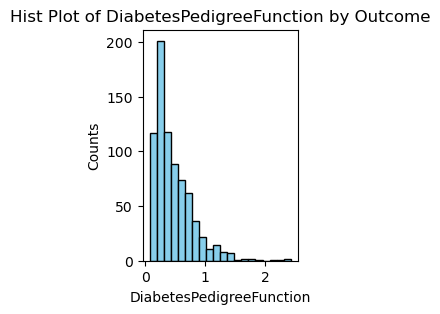

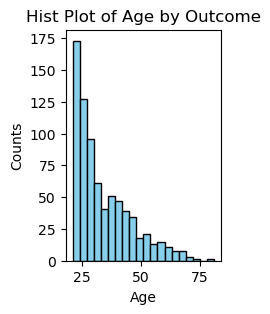

In [192]:
#Histograms Visulaizations
for i in num_features:
    plt.figure(figsize=(2, 3))
    plt.hist(df[i], bins=20, color='skyblue', edgecolor='black')
    plt.title('Hist Plot of {} by Outcome'.format(i))
    plt.xlabel(format(i))
    plt.ylabel("Counts")
    plt.show()


In [193]:
#Checking if we have missing values 
df.isna().sum(axis = 0)

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_0               0
Pregnancies_1               0
Pregnancies_2               0
Pregnancies_3               0
Pregnancies_4               0
Pregnancies_5               0
Pregnancies_6               0
Pregnancies_7               0
Pregnancies_8               0
Pregnancies_9               0
Pregnancies_10              0
Pregnancies_11              0
Pregnancies_12              0
Pregnancies_13              0
Pregnancies_14              0
Pregnancies_15              0
Pregnancies_17              0
dtype: int64

In [194]:
##WE don't have any missing values, however some values are not representative, zero values 
##We will exchange them with nan numpy objects and use Knearest imputer objects to impute those values 

In [195]:
import numpy as np
from sklearn.impute import KNNImputer
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)



In [196]:
#Dealing wit outlier values
##First off we define a function called has_outliers which returns a boolean expression either true of false, if the dataframes column has an outlier value or not respectively
###We then create an outliers mask data series which we use to index our columns to retrieve the indexes and the outlier values 
####We then replace the outlier values with a numpy nan object and impute those nan values with a Knearest imputer object 

In [197]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
def has_outliers(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    
    outliers_mask = (dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)
    return outliers_mask.any()

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    outliers_mask = ((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))
    
    return outliers_mask

def replace_outliers_with_nan_and_impute(df, n_neighbors=5):
    # Iterate over each column
    for col in num_features:
        if has_outliers(df, col):
                 outliers_mask = check_outlier(df, col)
                 df.loc[outliers_mask, col] = np.nan
        
                 imputer = KNNImputer(n_neighbors=n_neighbors)
                 df[col] = imputer.fit_transform(df[[col]])
    
    return df

df = replace_outliers_with_nan_and_impute(df)


C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\saeed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


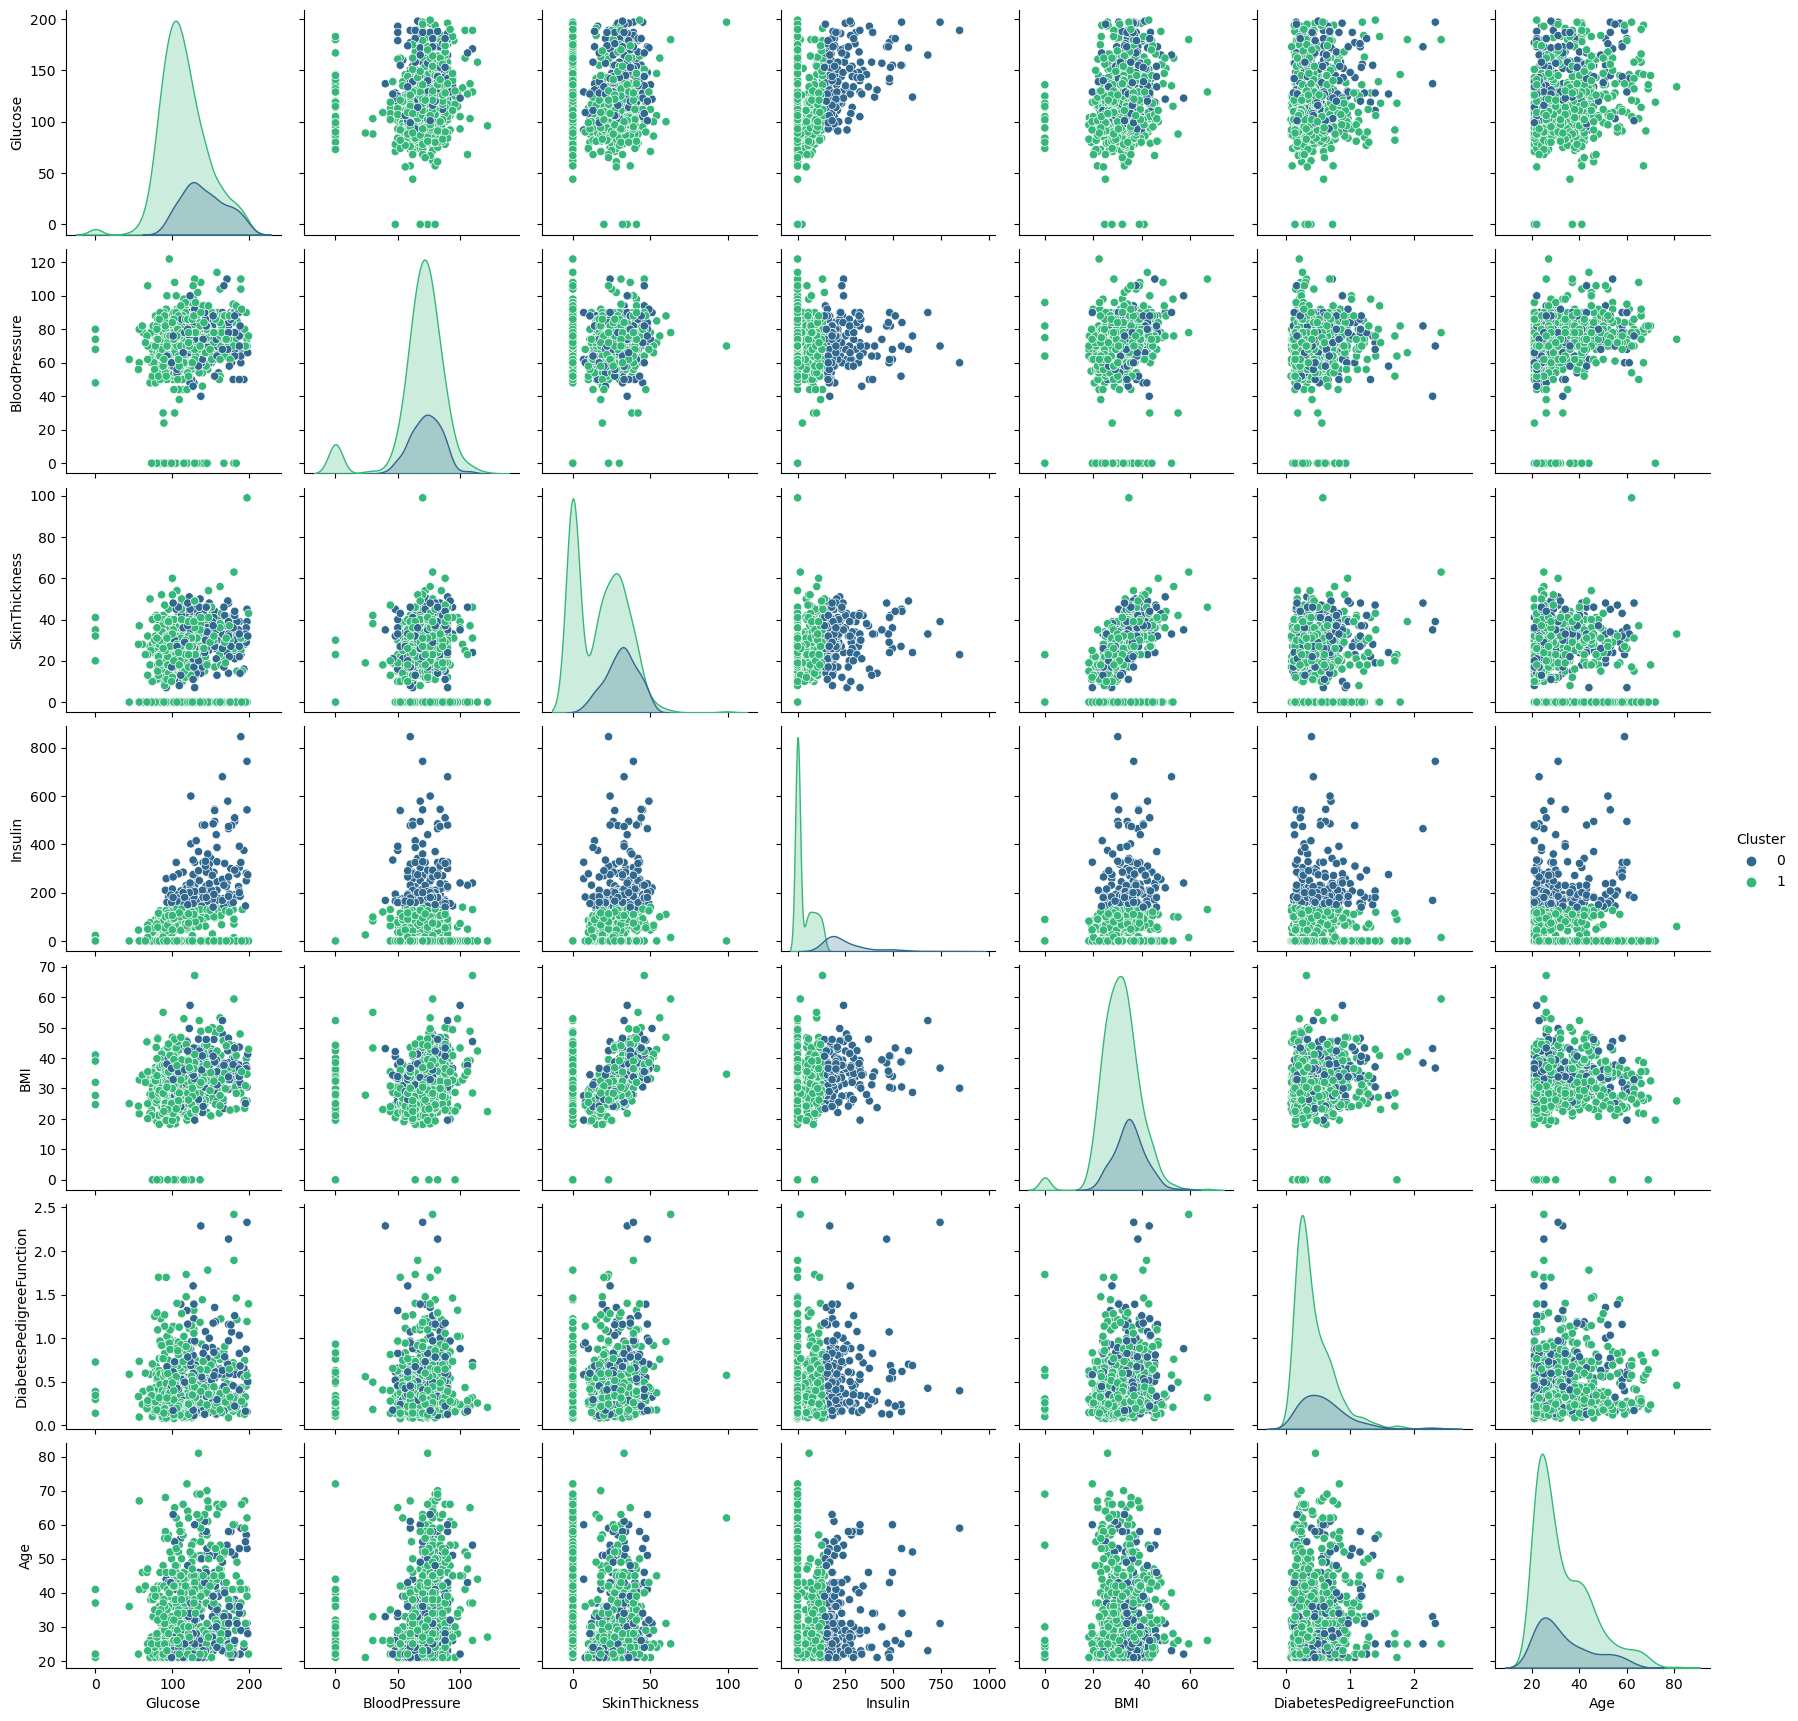

In [174]:
#Clustering our data as it might be useful for observing existing patterns between our fetures 
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


X = df[num_features]


kmeans = KMeans(n_clusters=2, n_init=10)


kmeans.fit(X)


labels = kmeans.labels_


df['Cluster'] = labels


sns.pairplot(df, hue='Cluster', palette='viridis', vars=num_features)
plt.show()



In [53]:
#We will take a look at the outcome variable value counts as it looks like this dataset is imbalanced
df["Outcome"].value_counts()

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

In [54]:
#It turns out that it is imbalanced 
##We will use KStratifiedFold objects during the crossvalidation process

In [198]:
from sklearn.model_selection import train_test_split
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [201]:
#Normalizing our features, so that we help the model to converge faster 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_train)

In [202]:
#Creating a logistic regressor estimator 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [203]:
#Using cross validation with kfold stratified 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(regressor, X_train, y_train, cv = stratified_kfold)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}
grid_search = GridSearchCV(classifier, param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)
best_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\saeed\anaconda3\Lib\site-packa

In [85]:
best_estimator

RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=50)

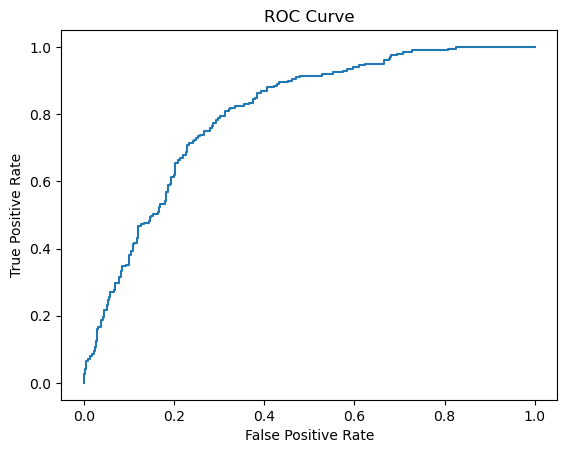

In [204]:
#Visualizing the ROC curve 
from sklearn.metrics import roc_curve, precision_recall_curve

from sklearn.model_selection import cross_val_predict
classifier_2 = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=30)
classifier_2.fit(X_train, y_train)

y_probs_cv = cross_val_predict(classifier_2, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr, tpr, thresholds_roc = roc_curve(y_train, y_probs_cv)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

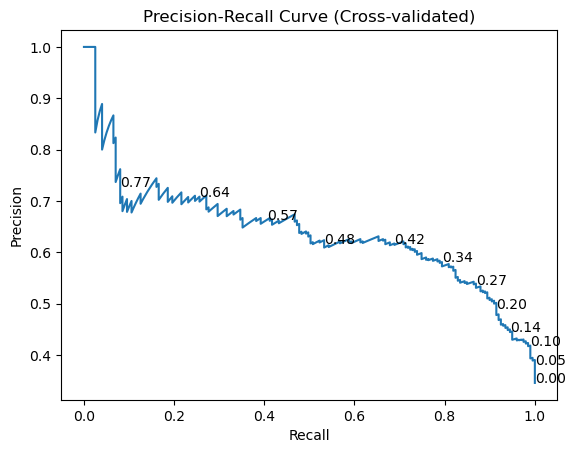

In [205]:
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_probs_cv)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Cross-validated)')
for i, threshold in enumerate(thresholds_pr):
    if i % 50 == 0:  # Plot every 50th threshold value for better readability
        plt.annotate(f'{threshold:.2f}', (recall[i], precision[i]))

plt.show()


In [206]:
#Missing true positives ('potential diabetes patients') would be so undesiarable so we will opt for optimizing or models score 
#.20 seems like a godd midpoint between high precision and high recall 
threshold = 0.36
y_pred_threshold = (y_probs_cv[:] >= threshold).astype(int)
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred_threshold)


recall = recall_score(y_train, y_pred_threshold)
print(f"precision: {precision}")
print(f"recall: {recall}")


precision: 0.5875486381322957
recall: 0.7587939698492462


In [97]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter = 4000)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter values
    'penalty': ['l2']  # Type of regularization
}




grid_search = GridSearchCV(regressor, param_grid, cv=stratified_kfold)

grid_search.fit(X_train, y_train)

best_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

best_estimator = grid_search.best_estimator_

In [100]:
regessor = best_estimator

In [152]:
regressor.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

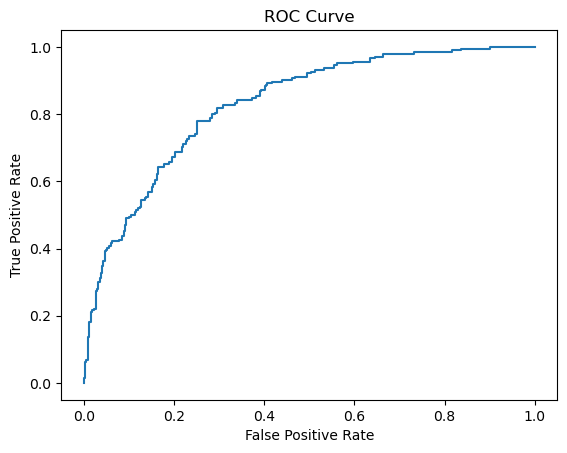

In [101]:
y_probs_cv = cross_val_predict(regessor, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr, tpr, thresholds_roc = roc_curve(y_train, y_probs_cv)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

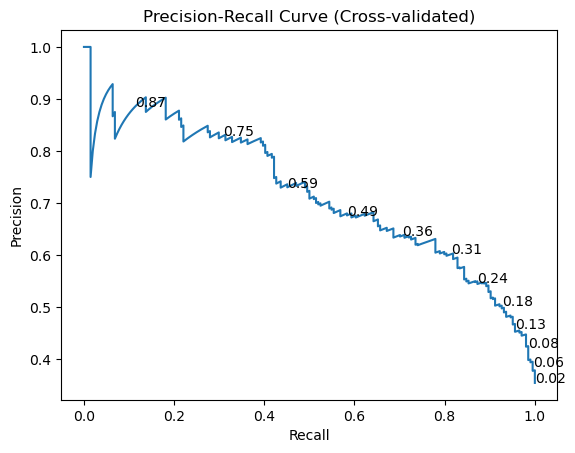

In [102]:
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_probs_cv)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Cross-validated)')
for i, threshold in enumerate(thresholds_pr):
    if i % 50 == 0:
        plt.annotate(f'{threshold:.2f}', (recall[i], precision[i]))

plt.show()


In [116]:
threshold = 0.24
y_pred_threshold = (y_probs_cv[:] >= threshold).astype(int)
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred_threshold)


recall = recall_score(y_train, y_pred_threshold)
print(f"precision: {precision}")
print(f"recall: {recall}")


precision: 0.5476923076923077
recall: 0.8725490196078431


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'],
}

grid_search = GridSearchCV(classifier, param_grid, cv=stratified_kfold)

grid_search.fit(X_train, y_train)

best_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

best_estimator = grid_search.best_estimator_


C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\saeed\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\saeed\anaconda3\Lib\site-packag

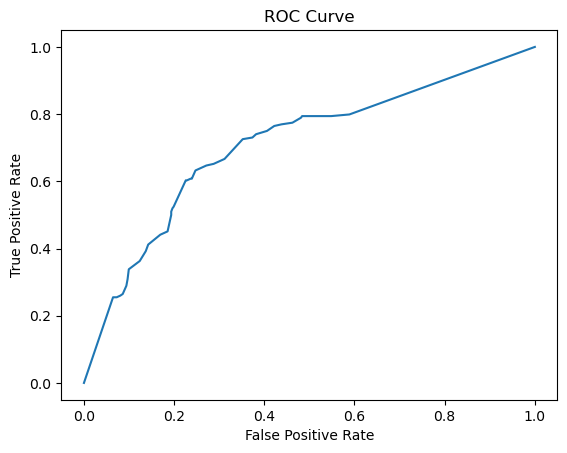

In [123]:
treeclassifier = best_estimator
y_probs_cv = cross_val_predict(treeclassifier, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr, tpr, thresholds_roc = roc_curve(y_train, y_probs_cv)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

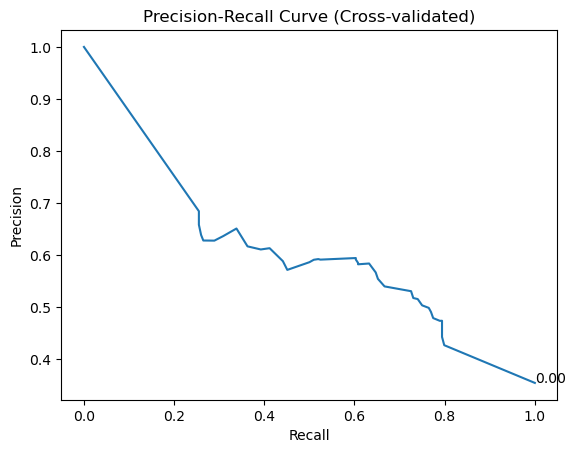

In [124]:
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_probs_cv)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Cross-validated)')
for i, threshold in enumerate(thresholds_pr):
    if i % 50 == 0:  
        plt.annotate(f'{threshold:.2f}', (recall[i], precision[i]))

plt.show()


In [125]:
threshold = 0.24
y_pred_threshold = (y_probs_cv[:] >= threshold).astype(int)
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred_threshold)


recall = recall_score(y_train, y_pred_threshold)
print(f"precision: {precision}")
print(f"recall: {recall}")


precision: 0.5304659498207885
recall: 0.7254901960784313


In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

support_vector_machine = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto'],  
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=stratified_kfold)

grid_search.fit(X_train, y_train)

best_hyperparams = grid_search.best_params_
best_score = grid_search.best_score_

best_estimator = grid_search.best_estimator_


In [138]:
best_estimator

SVC(C=0.1, kernel='linear')

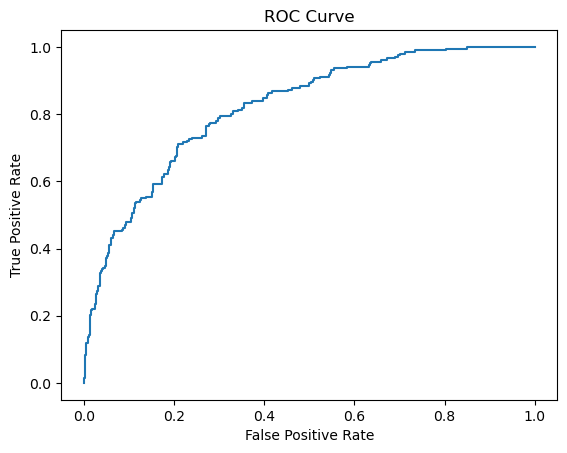

In [149]:
support_vector_machine = SVC(C=0.1, kernel='linear', probability=True)
support_vector_machine.fit(X_train, y_train)
y_probs_cv = cross_val_predict(support_vector_machine, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr, tpr, thresholds_roc = roc_curve(y_train, y_probs_cv)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

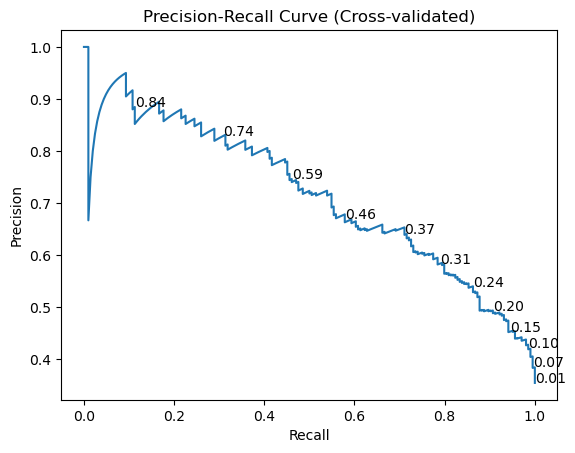

In [140]:
precision, recall, thresholds_pr = precision_recall_curve(y_train, y_probs_cv)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Cross-validated)')
for i, threshold in enumerate(thresholds_pr):
    if i % 50 == 0:  
        plt.annotate(f'{threshold:.2f}', (recall[i], precision[i]))

plt.show()

In [141]:
threshold = 0.31
y_pred_threshold = (y_probs_cv[:] >= threshold).astype(int)
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred_threshold)


recall = recall_score(y_train, y_pred_threshold)
print(f"precision: {precision}")
print(f"recall: {recall}")


precision: 0.5860805860805861
recall: 0.7843137254901961


In [142]:
#It seems to me that the best model so far is the random forest classifier with precision: 0.5507692307692308 recall: 0.8774509803921569
##at a .25 threshold.
## We will evaluate the model on our test set now, to see how good performing it is 

In [207]:
y_pred = classifier_2.predict(X_test)


In [210]:
threshold = 0.20
y_pred_threshold = (y_pred[:] >= threshold).astype(int)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7857142857142857
Recall: 0.6376811594202898


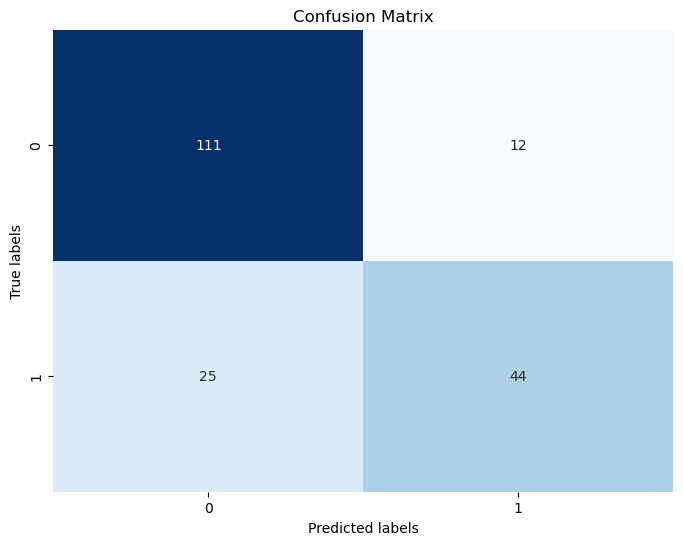

In [212]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
